### Pandas를 이용한 데이터 불러오기 & 정리

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding = 'utf-8') #인코딩이 안되면 engine = 'python'으로 해보세요!

In [3]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '지역구별'}, inplace= True)

In [4]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls', 
                          header = 2, usecols = 'B, D, G, J, N', encoding = 'utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [5]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '지역구별',
                            pop_Seoul.columns[1] : '인구수',
                            pop_Seoul.columns[2] : '한국인',
                            pop_Seoul.columns[3] : '외국인',
                            pop_Seoul.columns[4] : '고령자'}, inplace = True)
pop_Seoul.head()

,지역구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [6]:
pop_Seoul.drop([0], inplace = True)
pop_Seoul.head()

,지역구별,인구수,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [7]:
CCTV_Seoul.sort_values(by = '소계', ascending = True).head(5)

,지역구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [53]:
CCTV_Seoul.sort_values(by = '소계', ascending = False).head(5)

,지역구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
18,양천구,2482,1843,142,30,467,34.671731
14,서초구,2297,1406,157,336,398,63.371266
4,관악구,2109,846,260,390,613,149.290780
21,은평구,2108,1138,224,278,468,85.237258


In [8]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head(5)

,지역구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [9]:
CCTV_Seoul.sort_values(by='최근증가율', ascending = False).head(5)

,지역구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [10]:
#CCTV_Seoul 객체와 pop_Seoul 객체를 다음과 같이 통합해 보세요! (merge 함수 이용, 만들어진 객체의 이름은 'data_result'으로)
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '지역구별')
data_result.head()

,지역구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자
0,강남구,3238,1292,430,584,932,150.619195,547453,542364,5089,67085
1,강동구,1010,379,99,155,377,166.490765,431920,427573,4347,58770
2,강북구,831,369,120,138,204,125.203252,322915,319164,3751,58196
3,강서구,911,388,258,184,81,134.793814,603611,596949,6662,79660
4,관악구,2109,846,260,390,613,149.290780,520040,501957,18083,72249


In [11]:
data_result.head()

,지역구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자
0,강남구,3238,1292,430,584,932,150.619195,547453,542364,5089,67085
1,강동구,1010,379,99,155,377,166.490765,431920,427573,4347,58770
2,강북구,831,369,120,138,204,125.203252,322915,319164,3751,58196
3,강서구,911,388,258,184,81,134.793814,603611,596949,6662,79660
4,관악구,2109,846,260,390,613,149.290780,520040,501957,18083,72249


In [12]:
#'2013년도 이전', '2014년', '2015년', '2016년' 칼럼을 삭제해 주세요
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,지역구별,소계,최근증가율,인구수,한국인,외국인,고령자
0,강남구,3238,150.619195,547453,542364,5089,67085
1,강동구,1010,166.490765,431920,427573,4347,58770
2,강북구,831,125.203252,322915,319164,3751,58196
3,강서구,911,134.793814,603611,596949,6662,79660
4,관악구,2109,149.290780,520040,501957,18083,72249


In [15]:
data_result.set_index('지역구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자
지역구별,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085
강동구,1010,166.490765,431920,427573,4347,58770
강북구,831,125.203252,322915,319164,3751,58196
강서구,911,134.793814,603611,596949,6662,79660
관악구,2109,149.290780,520040,501957,18083,72249


In [17]:
import numpy as np

In [20]:
np.corrcoef(data_result['인구수'], data_result['소계']) #상관계수 구하기

array([[1.        , 0.22152789],
       [0.22152789, 1.        ]])

In [21]:
np.corrcoef(data_result['한국인'], data_result['소계'])

array([[1.        , 0.21698466],
       [0.21698466, 1.        ]])

### Matplotlib을 이용한 시각화

In [22]:
import matplotlib.pyplot as plt #matplotlib가 한글폰트를 지원 안해서 미리 처리해주는 과정
import platform                 #아마 요즘 matplotlib는 이런거 안해도 잘 될수도 있어요!

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':#윈도우 사용자
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

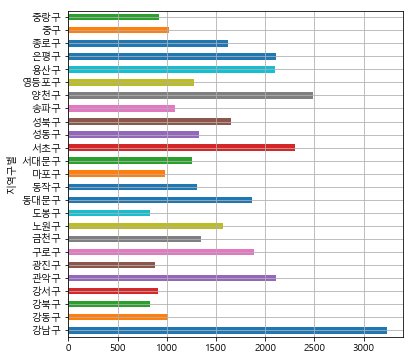

In [23]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(6,6)) #bar는 수직바, barh는 수평바(horizontal)
plt.show()

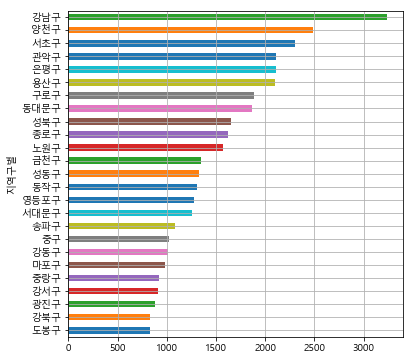

In [24]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(6,6))
plt.show()

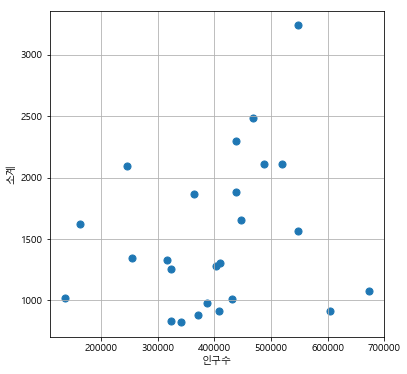

In [25]:
#(6,6) 사이즈의 '인구수'와 '소계'를 축으로 하는 scatter plot을 그리고 grid와 label도 달아 주세요.
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

In [32]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.07336946e-03, 1.08384235e+03])

In [31]:
fp1[0], fp1[1] #기울기, 절편

(0.0010733694593086892, 1083.8423507258071)

In [27]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

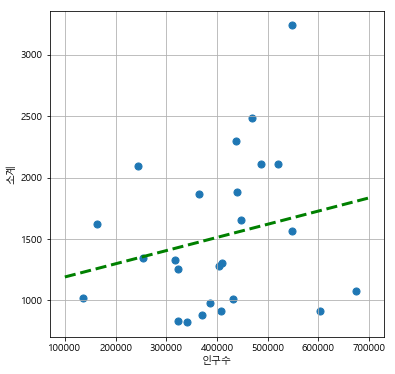

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color ='g')
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()
plt.show()

### Quest

In [29]:
#1.
#데이터셋’ 폴더의 CCTV_in_Seoul.csv, population_in_Seoul.csv를 이용, 
#pandas / numpy를 통해 아래와 같은 형태로 데이터를 정리해 볼 것. 
#'외국인비율’ = ‘외국인’ / ‘인구수’ * 100, ‘고령자비율’ = ‘고령자’ / ‘인구수’ * 100
#‘오차’ – l소계 – 회귀직선(인구수)l , 오차는 np.abs를 활용
data_result['외국인비율'] = data_result['외국인']/data_result['인구수']*100
data_result['고령자비율'] = data_result['고령자']/data_result['인구수']*100

data_result['오차'] = np.abs(data_result['소계']-fp1[0]*data_result['인구수']-fp1[1])
data_result.sort_values(by = '오차', ascending = False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
지역구별,,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020,1566.538319
양천구,2482,34.671731,468145,464185,3960,58045,0.845892,12.398936,895.665104
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241,820.739963
용산구,2096,53.216374,245090,228999,16091,37640,6.565343,15.357624,749.085528
서초구,2297,63.371266,438163,433951,4212,54751,0.961286,12.495578,742.846867


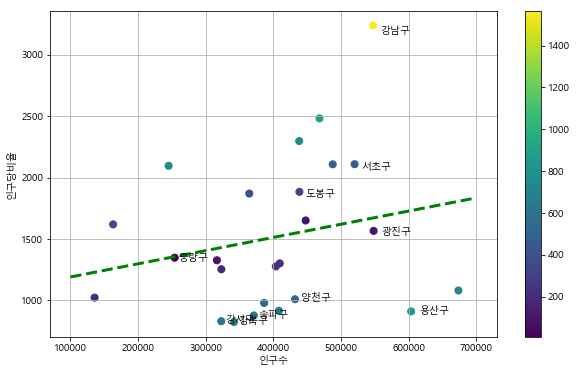

In [33]:
#2
#(1)에서 정리한 데이터를 ‘오차’ 컬럼을 기준으로 색깔을 입혀서 시각화 해보고
#이를 통해 무엇을 파악할 수 있는지 주석으로 간략하게 1-2줄로 서술해보기. (plt.colormap, plt.text 로 컬러맵과 이름 추가)
k = list(data_result['인구수'])
l = list(data_result['소계'])
m = ['강남구', '양천구', '강서구', '용산구', '서초구', '송파구', '도봉구', '중랑구', '광진구', '강북구']
plt.figure(figsize = (10,6))
colormap = data_result['오차']
plt.scatter(data_result['인구수'], data_result['소계'], c = colormap, s = 50)
plt.colorbar()
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
plt.grid()

for i in range(10):
    plt.text(k[i]*1.02, l[i]*0.98, m[i], fontsize = 10)
plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.show()
